# 𝐷𝑎𝑡𝑎 𝑀𝑖𝑛𝑖𝑛𝑔 𝑀𝐼𝐷𝑇𝐸𝑅𝑀 𝑃𝑅𝑂𝐽𝐸𝐶𝑇
# 𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑖𝑛𝑔 𝑀𝑖𝑐𝑟𝑜𝑠𝑜𝑓𝑡 𝑆𝑡𝑜𝑐𝑘 𝑃𝑟𝑖𝑐𝑒𝑠 𝑓𝑜𝑟 2022 𝑢𝑠𝑖𝑛𝑔 𝑅𝑎𝑛𝑑𝑜𝑚 𝐹𝑜𝑟𝑒𝑠𝑡 𝑅𝑒𝑔𝑟𝑒𝑠𝑠𝑜𝑟 𝑖𝑛 𝑃𝑦𝑡ℎ𝑜𝑛
                                                                                             Created by ATA GÜRSEL

In [1]:
import pandas as pd # pandas is a Python library used for data analysis and manipulation.
import os # os is a Python module used for operating system operations.
from datetime import datetime # datetime is a Python module used for date and time operations.
from sklearn.ensemble import RandomForestRegressor # RandomForestRegressor is a machine learning model used to apply the random forest regression model.
import matplotlib.pyplot as plt # matplotlib is a Python library used for visualizing data.
from sklearn.metrics import r2_score # r2_score is a function from sklearn.metrics used to compute the R-squared accuracy score.
from sklearn.metrics import mean_squared_error # mean_squared_error is a function from sklearn.metrics used to compute the mean squared error.

In [2]:
# Upload the data if the file exists, otherwise print an error message.
if os.path.exists("msft_2000-2021.csv"):
    msft = pd.read_csv("msft_2000-2021.csv", index_col=0)
else:
    print("Error: msft_2000-2021.csv does not exist!")

In [3]:
# Convert index to datetime format.
msft.index = pd.to_datetime(msft.index)
# Remove unnecessary columns.
del msft["Adj Close"]
del msft["Volume"]
# Closing prices are shifted forward one day, creating a new column called "Tomorrow".
msft["Tomorrow"] = msft["Close"].shift(-1)
# It stores data from January 1, 2000 to December 31, 2021.
msft = msft.loc["2000-01-01":"2021-12-31"].copy()

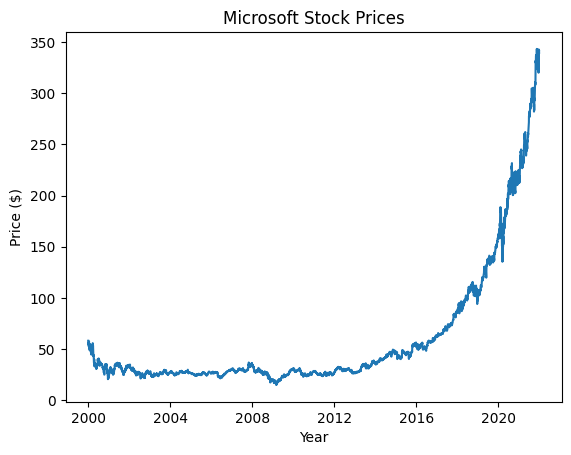

In [4]:
# Plot the Microsoft stock prices showing 2000-2021 close prices.
plt.plot(msft["Close"])
plt.title("Microsoft Stock Prices")
plt.xlabel("Year")
plt.ylabel("Price ($)")
plt.show()

In [5]:
# I Created a Random Forest Regression model with 100 estimators and 100 minimum samples to split and set the random state to 1.
model = RandomForestRegressor(n_estimators=100, min_samples_split=100, random_state=1)
# Defining predictors as "Close", "Open", "High", "Low".
predictors = ["Close", "Open", "High", "Low"]
# Selecting predictors as X_train.
X_train = msft[predictors]
# Selecting the "Close" column as the y_train target variable.
y_train = msft["Close"]
# Training the model using predictors and target variables.
model.fit(X_train, y_train)

RandomForestRegressor(min_samples_split=100, random_state=1)

In [6]:
# Read the 2022 data from a CSV file.
future = pd.read_csv("MSFT_2022.csv", index_col=0)
# Get the predictors for the 2022 data.
future_predictors = future[predictors]
# Make predictions on the 2022 data using the trained model.
future_preds = model.predict(future_predictors)
# Create a pandas series from the predictions with the same index as the future data.
future_preds = pd.Series(future_preds, index=future.index, name="Predictions")

In [7]:
# Create new target column.
future["Tomorrow"] = future["Close"].shift(-1)
future["Target"] = future["Tomorrow"]

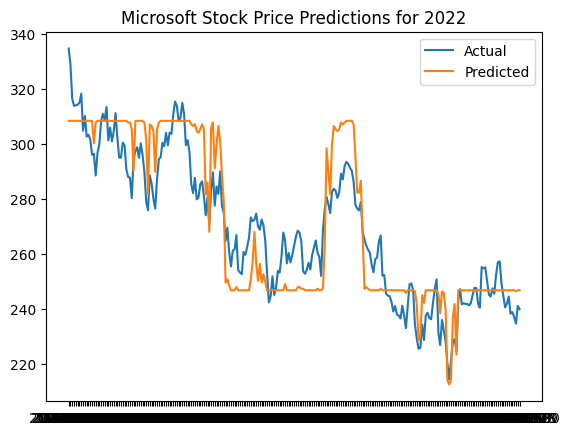

In [8]:
# Plot the actual and predicted Microsoft stock prices for 2022
plt.plot(future["Close"], label="Actual")
plt.plot(future_preds, label="Predicted")
plt.title("Microsoft Stock Price Predictions for 2022")
plt.legend()
plt.show()

In [9]:
# Calculate R^2 and Mean Squared Error.
r2 = r2_score(future["Close"], future_preds)
mse = mean_squared_error(future["Close"], future_preds)

In [10]:
# Print accuracy rate and mean square error.
print(f"Accuracy rate: {r2*100:.2f}%")
print(f"Mean Squared Error: {mse:.2f}")

Accuracy rate: 76.93%
Mean Squared Error: 152.50
